In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

{'0': 486, '1': 538}
Job Status: job has successfully run


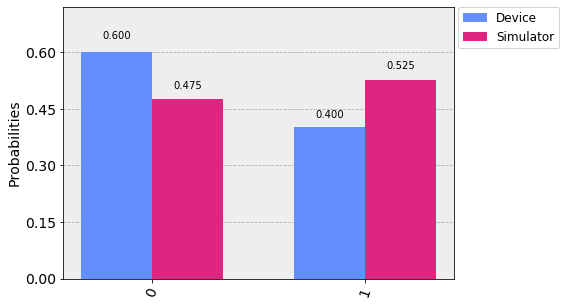

In [5]:
import numpy as np
from qiskit import *
%matplotlib inline

circ = QuantumCircuit(3,1)
circ.h(0)
circ.h(1)
circ.cx(0, 2)
circ.cx(1, 2)
circ.measure(2,0)
circ.draw()

backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()

counts = result_sim.get_counts(circ)
print(counts)

backend = provider.get_backend('ibmq_london')

from qiskit.visualization import plot_histogram
plot_histogram(counts)

#from qiskit import IBMQ
#IBMQ.load_account()
#IBMQ.providers()
#provider = IBMQ.get_provider(group='open')
#provider.backends()

backend = provider.get_backend('ibmq_london')

from qiskit.tools.monitor import job_monitor

job_exp = execute(circ, backend=backend)
job_monitor(job_exp)

result_exp = job_exp.result()

counts_exp = result_exp.get_counts(circ)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

#results analysis

#the simulation has been done 1024 times. The statistical error (3,1%) can be observed as the results are
#not exactly equaly divided into "0" and "1".

#the computation on the real device reveals error due to the qubits : the "0" is favoured (60%) compared to
# "1" (40%) as the qubits "prefer" their fondamental state



